In [2]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [28]:
# general settings for signal and noise
num_samples = 1000
signal_power = 5.0  # in dB
noise_power = 15.0  # in dB

In [29]:
# some sample analytics using the 'precise' Chi2 distribution

thr = ss.chi2_stats.thr(noise_power=noise_power,
                        pfa=0.1,
                        n=num_samples,
                        dB=True)

pfa = ss.chi2_stats.pfa(noise_power=noise_power,
                        thr=thr,
                        n=num_samples,
                        dB=True)

pd = ss.chi2_stats.pd(noise_power=noise_power,
                      signal_power=signal_power,
                      thr=thr,
                      n=num_samples,
                      dB=True)

roc = ss.chi2_stats.roc(noise_power=noise_power,
                        signal_power=signal_power,
                        pfa=pfa,
                        n=num_samples,
                        dB=True)
print('Threshold Chi2:                  %.2f' % (thr))
print('Pobability of false alarm Chi2:  %.2f' % (pfa))
print('Probability of detection Chi2:   %.2f' % (pd))
print('Receveiver operating curve Chi2: %.2f' % (roc))

Threshold Chi2:                  32910.91
Pobability of false alarm Chi2:  0.10
Probability of detection Chi2:   0.96
Receveiver operating curve Chi2: 0.96


In [30]:
# some sample analytics using the 'approximate' CLT 'Gauss' distribution

thr = ss.clt_stats.thr(noise_power=noise_power,
                       pfa=0.1,
                       n=num_samples,
                       dB=True)

pfa = ss.clt_stats.pfa(noise_power=noise_power,
                       thr=thr,
                       n=num_samples,
                       dB=True)

pd = ss.clt_stats.pd(noise_power=noise_power,
                     signal_power=signal_power,
                     thr=thr,
                     n=num_samples,
                     dB=True)

roc = ss.clt_stats.roc(noise_power=noise_power,
                       signal_power=signal_power,
                       pfa=pfa,
                       n=num_samples,
                       dB=True)

num = ss.clt_stats.num(noise_power=noise_power,
                       signal_power=signal_power,
                       pfa=pfa,
                       pd=pd,
                       dB=True)
print('Threshold CLT:                   %.2f' % (thr))
print('Pobability of false alarm CLT:   %.2f' % (pfa))
print('Probability of detection CLT:    %.2f' % (pd))
print('Receveiver operating curve CLT:  %.2f' % (roc))
print('Number of samples needed CLT:    %.2f' % (num))

Threshold CLT:                   32904.33
Pobability of false alarm CLT:   0.10
Probability of detection CLT:    0.96
Receveiver operating curve CLT:  0.96
Number of samples needed CLT:    4474.00


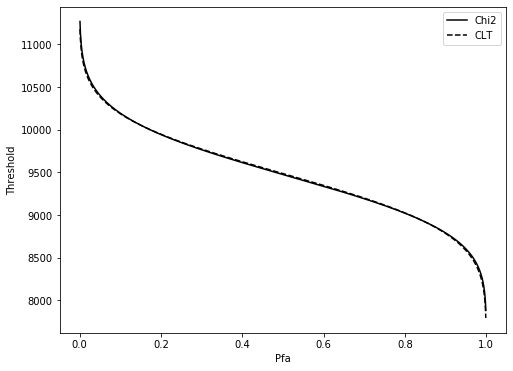

In [46]:
# compare the two distributions letting pfa go from 0% to 99.9% (with num_samples)
num_samples = 300
pfa = np.linspace(0, 0.999, 1000) # dont confuse the 1000 sample points with 'num_samples'

# compare thresholds (from pfa)
thr_chi2 = ss.chi2_stats.thr(noise_power=noise_power,
                             pfa=pfa,
                             n=num_samples,
                             dB=True)
thr_clt = ss.clt_stats.thr(noise_power=noise_power,
                           pfa=pfa,
                           n=num_samples,
                           dB=True)

plt.figure(figsize=(8, 6))
plt.plot(pfa, thr_chi2, 'k-', aa=True)
plt.plot(pfa, thr_clt, 'k--', aa=True)
plt.legend(('Chi2', 'CLT'), loc=0)
plt.xlabel(r'Pfa')
plt.ylabel(r'Threshold')
plt.show()

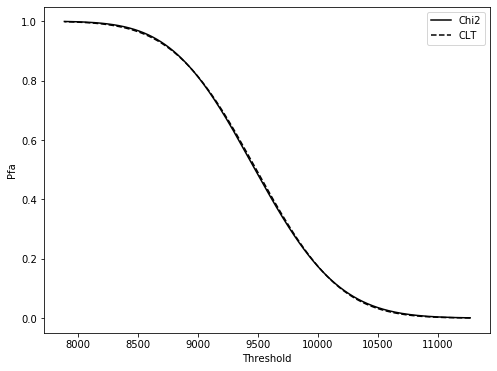

In [47]:
# compare probability of false alarm (from threshold)
pfa_chi2 = ss.chi2_stats.pfa(noise_power=noise_power,
                             thr=thr_chi2,
                             n=num_samples,
                             dB=True)
pfa_clt = ss.clt_stats.pfa(noise_power=noise_power,
                           thr=thr_chi2,
                           n=num_samples,
                           dB=True)

plt.figure(figsize=(8, 6))
plt.plot(thr_chi2, pfa_chi2, 'k-', aa=True)
plt.plot(thr_chi2, pfa_clt, 'k--', aa=True)
plt.legend(('Chi2', 'CLT'), loc=0)
plt.xlabel(r'Threshold')
plt.ylabel(r'Pfa')
plt.show()

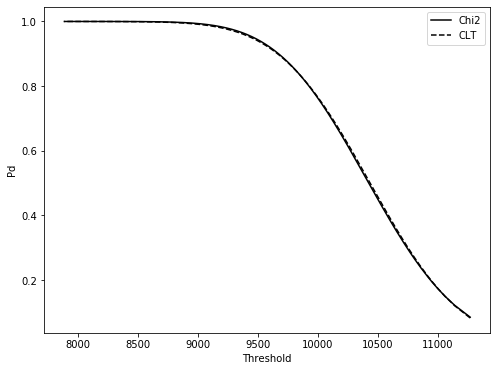

In [48]:
# compare probability of detection (from thr)
pd_chi2 = ss.chi2_stats.pd(noise_power=noise_power,
                           signal_power=signal_power,
                           thr=thr_chi2,
                           n=num_samples,
                           dB=True)
pd_clt = ss.clt_stats.pd(noise_power=noise_power,
                         signal_power=signal_power,
                         thr=thr_chi2,
                         n=num_samples,
                         dB=True)

plt.figure(figsize=(8, 6))
plt.plot(thr_chi2, pd_chi2, 'k-', aa=True)
plt.plot(thr_chi2, pd_clt, 'k--', aa=True)
plt.legend(('Chi2', 'CLT'), loc=0)
plt.xlabel(r'Threshold')
plt.ylabel(r'Pd')
plt.show()

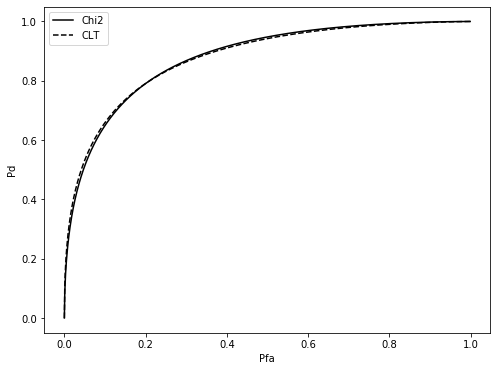

In [49]:
# compare receiver operating curves (from pfa)
roc_chi2 = ss.chi2_stats.roc(noise_power=noise_power,
                           signal_power=signal_power,
                           pfa=pfa,
                           n=num_samples,
                           dB=True)
roc_clt = ss.clt_stats.roc(noise_power=noise_power,
                         signal_power=signal_power,
                         pfa=pfa,
                         n=num_samples,
                         dB=True)

plt.figure(figsize=(8, 6))
plt.plot(pfa, roc_chi2, 'k-', aa=True)
plt.plot(pfa, roc_clt, 'k--', aa=True)
plt.legend(('Chi2', 'CLT'), loc=0)
plt.xlabel(r'Pfa')
plt.ylabel(r'Pd')
plt.show()